In [ ]:
#Team L.A.P.E.

import numpy as np 
import pandas as pd 
import tensorflow as tf

tf.random.set_seed(100)


In [ ]:
import bs4
import os
import numpy as np
import pandas as pd 
path='/content/drive/MyDrive/FIA_Segnali_Stradali/annotations/'
content=[]
speedcounter = 0

for filename in os.listdir(path):
    
    if not filename.endswith('.xml'): continue
    finalpath= os.path.join(path, filename)

    infile = open(finalpath,"r")

    contents = infile.read()
    #Parsing xml
    soup = bs4.BeautifulSoup(contents,'xml')
    class_name=soup.find_all("name")
    name = soup.find_all('filename')
    width= soup.find_all("width")
    height=soup.find_all("height")
    depth=soup.find_all("depth")
    
    ls=[]
    for x in range(0,len(name)):
        for i in name:
            name=name[x].get_text()
            path_name="images/"+name

        class_name=class_name[x].get_text()
        if class_name=='speedlimit':
          if speedcounter < 75:
            #It counts the 'speedlimit' images
            height=int(height[x].get_text())
            depth=int(depth[x].get_text())
            width=int(width[x].get_text())
            f_name=filename
            ls.extend([f_name,path_name,width,height,depth,class_name])
            speedcounter = speedcounter + 1
            content.append(ls)
        else:
          #It selects the other classes('stop','crosswalk','trafficlight')
          height=int(height[x].get_text())
          depth=int(depth[x].get_text())
          width=int(width[x].get_text())
          f_name=filename
          ls.extend([f_name,path_name,width,height,depth,class_name])
          content.append(ls)

import pandas as pd
new_cols = ["f_name","path_name", "width","height","depth","class_name"]
data = pd.DataFrame(data = content, columns = new_cols)
data.class_name=data.class_name.map({'trafficlight':1, 'speedlimit':2, 'crosswalk':3, 'stop':4})
print(data.shape)
data.head()


(300, 6)


,f_name,path_name,width,height,depth,class_name
0,road822.xml,images/road822.png,300,400,3,1
1,road642.xml,images/road642.png,300,400,3,2
2,road492.xml,images/road492.png,300,400,3,2
3,road686.xml,images/road686.png,300,400,3,2
4,road666.xml,images/road666.png,300,400,3,2


In [ ]:
print("Waiting. . .")
data1=[]
from PIL import Image,ImageTk
import numpy

i=0

for a in data.path_name.values:

    image = Image.open("/content/drive/MyDrive/FIA_Segnali_Stradali/"+a).convert("RGB")

    #Image resizing is needed to upgrade the resolution
    image=image.resize((224,224),Image.ANTIALIAS)
    image=numpy.array(image.getdata()).reshape(224,224,3)
    data1.append(image)


print("---Done---")

Waiting. . .
---Done---


In [ ]:
X=np.array(data1)

y=np.array(data.iloc[:,-1],dtype=int)

import keras

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image


from sklearn.model_selection import train_test_split
c=to_categorical(y,dtype=int)
Y=c[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=787)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
#Layer definition
model = Sequential()
model.add(Conv2D(128, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Compilation of the model
#categorical_crossentropy(multiclass classification problems)
#Optimizer Adaptive Moment lr=0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

(210, 224, 224, 3) (90, 224, 224, 3) (210, 4) (90, 4)


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 2s 171ms/step - loss: 23205.2421 - acc: 0.1952 - val_loss: 8861.8252 - val_acc: 0.3111
Epoch 2/50
7/7 [==============================] - 1s 144ms/step - loss: 7382.5839 - acc: 0.3093 - val_loss: 1376.0580 - val_acc: 0.2111
Epoch 3/50
7/7 [==============================] - 1s 168ms/step - loss: 865.0102 - acc: 0.2858 - val_loss: 324.1103 - val_acc: 0.5000
Epoch 4/50
7/7 [==============================] - 1s 145ms/step - loss: 301.8087 - acc: 0.4104 - val_loss: 223.8918 - val_acc: 0.3000
Epoch 5/50
7/7 [==============================] - 1s 143ms/step - loss: 104.5028 - acc: 0.4671 - val_loss: 26.3775 - val_acc: 0.5889
Epoch 6/50
7/7 [==============================] - 1s 144ms/step - loss: 12.1599 - acc: 0.7286 - val_loss: 9.4478 - val_acc: 0.5778
Epoch 7/50
7/7 [==============================] - 1s 145ms/step - loss: 0.8054 - acc: 0.8749 - val_loss: 6.8186 - val_acc: 0.5444
Epoch 8/50
7/7 [==============================] - 1s 144ms/step -

3/3 [==============================] - 0s 26ms/step - loss: 8.9181 - acc: 0.5222


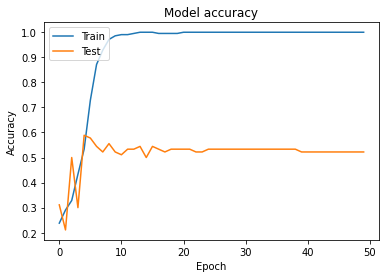

In [ ]:
import matplotlib.pyplot as plt

#Evaluating
results= model.evaluate(X_test,y_test,batch_size=32)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()